In [1]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt

%matplotlib inline
  

C:\Users\91934\AppData\Local\Temp\ipykernel_9164\214981880.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df.isnull()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,False,False,False,False,False,False,False
2006-12-16 17:25:00,False,False,False,False,False,False,False
2006-12-16 17:26:00,False,False,False,False,False,False,False
2006-12-16 17:27:00,False,False,False,False,False,False,False
2006-12-16 17:28:00,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,False,False,False,False,False,False,False
2010-11-26 20:59:00,False,False,False,False,False,False,False
2010-11-26 21:00:00,False,False,False,False,False,False,False


In [5]:
sum(df.duplicated())

168560

In [6]:
df1=df.drop_duplicates()

In [7]:
sum(df1.duplicated())

0

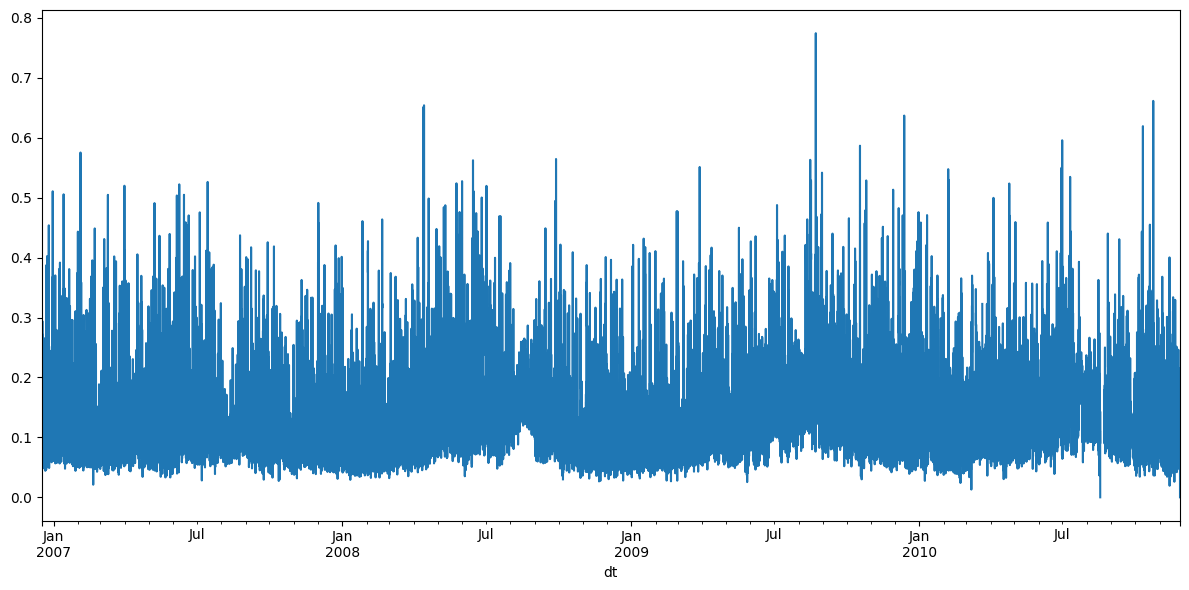

In [8]:
plt.figure(figsize=(12,6))
df1.Global_reactive_power.resample('1H').mean().plot()  #mean() gives the sum of global_active_power for an hour
plt.tight_layout()

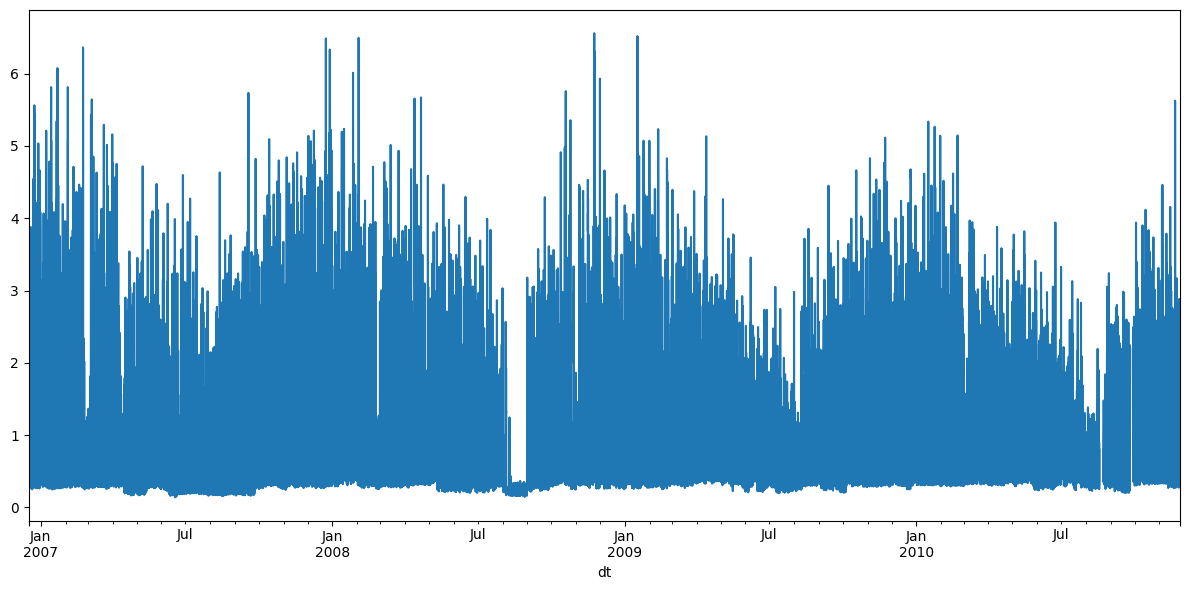

In [9]:
plt.figure(figsize=(12,6))
df1.Global_active_power.resample('1H').mean().plot()  #mean() gives the sum of global_active_power for an hour
plt.tight_layout()

<Axes: ylabel='Frequency'>

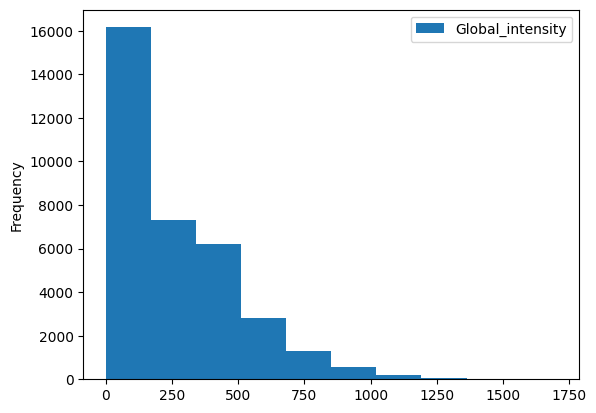

In [10]:
df1.Global_intensity.resample('1H').sum().plot(kind='hist',legend=True)


<Axes: ylabel='Frequency'>

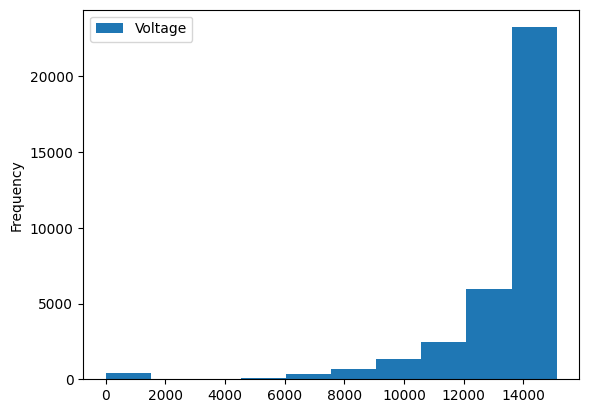

In [11]:
df1.Voltage.resample('1H').sum().plot(kind='hist',legend=True)

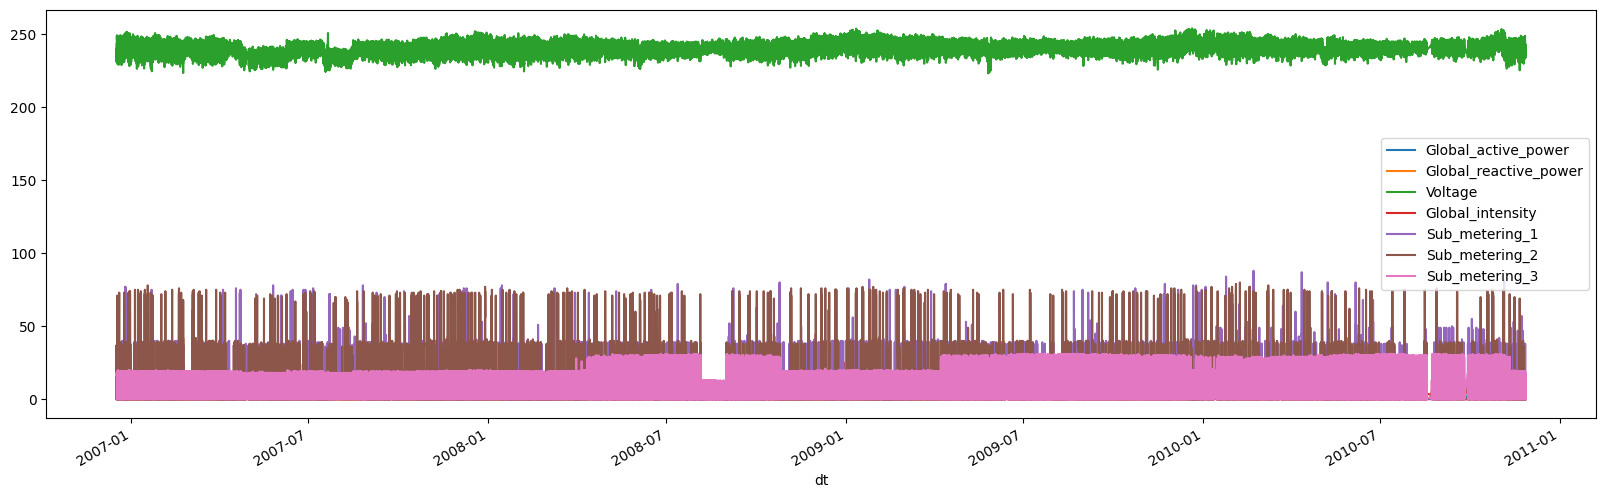

In [12]:
df1.plot(figsize=(20, 6))
plt.show()

In [13]:
df1.drop('Voltage',axis=1,inplace=True)

C:\Users\91934\AppData\Local\Temp\ipykernel_9164\4172890279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('Voltage',axis=1,inplace=True)


In [14]:
df1_diff=df.copy(deep=True)
df1_diff.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [15]:
df1_diff.reset_index(inplace=True)
df1_diff.head()

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [16]:
def month(x):
    return x.month
df1_diff['Month']= df1_diff['dt'].apply(lambda x: month(x))
def year(x):
    return x.year
df1_diff['Year']=df1_diff['dt'].apply(lambda x: year(x))
def hour(x):
    return x.hour
df1_diff['Hour']= df1_diff['dt'].apply(lambda x: hour(x))

In [17]:
df1_diff.drop('dt',axis=1,inplace=True)
df1_diff.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Hour
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,12,2006,17
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,12,2006,17
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,12,2006,17
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,12,2006,17
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,12,2006,17


In [18]:
df1.head()

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,
2006-12-16 17:24:00,4.216,0.418,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,15.8,0.0,1.0,17.0


In [19]:
X=df1.drop('Global_active_power',axis=1)
Y=df1['Global_active_power']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)



In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train2 = pd.DataFrame(scaler.fit_transform(X_train))
X_test2 = pd.DataFrame(scaler.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [21]:
import seaborn as sns

In [22]:
from sklearn.linear_model import LinearRegression

In [26]:
mask = ~np.isnan(X_train).any(axis=1)
X_train = X_train[mask]
Y_train = Y_train[mask]

In [24]:
lm = LinearRegression()
lm.fit(X_train, Y_train)


LinearRegression()

In [27]:
mask = ~np.isnan(X_train).any(axis=1)
X_train = X_train[mask]
Y_train = Y_train[mask]

In [29]:
predictions_linear = lm.predict(X_train)

In [31]:
mask = ~np.isnan(X_test2).any(axis=1)
X_test2 = X_test[mask]
Y_test2 = Y_test[mask]

In [33]:
predictions_linear=lm.predict(X_test2)

In [34]:
lm.predict([[5.360,0.436,23.0,1.0,16.0]])

c:\Users\91934\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.13139148])

In [35]:
lm.intercept_

0.052231822414961604

In [36]:
lm.coef_

array([-0.24462233, 11.40988159, -0.02690508, -0.03222777,  0.06666697])

In [37]:
0.05221692254020649*4.12195804+-0.24460855, 11.40877025, -0.02753312, -0.03264837,  0.06703308

(-0.029372586311338655, 11.40877025, -0.02753312, -0.03264837, 0.06703308)

In [39]:
df_result = pd.DataFrame({'Actual': Y_test2, 'Predicted': predictions_linear})
df_result.head()

,Actual,Predicted
dt,,
2007-04-26 11:21:00,0.460,0.557880
2009-07-11 21:20:00,0.890,0.877081
2007-05-18 05:06:00,0.322,0.321512
2008-07-30 04:45:00,0.346,0.433134
2007-05-16 11:46:00,1.370,1.414421


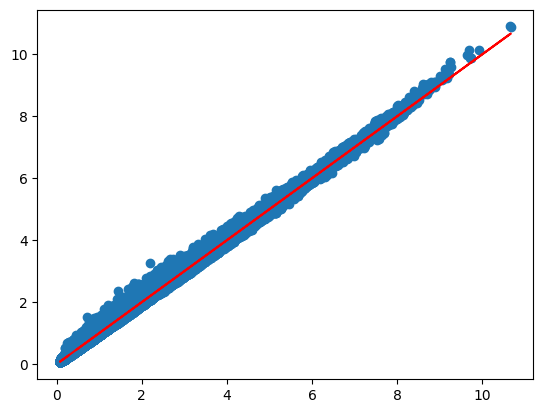

In [40]:
plt.scatter(df_result['Actual'],df_result['Predicted'])
plt.plot(Y_test2,Y_test2,'r')

In [42]:
df_result = pd.DataFrame({'Actual': Y_test2, 'Predicted': predictions_linear})
df_carbon_emission=((df_result)*436)
df_carbon_emission


,Actual,Predicted
dt,,
2007-04-26 11:21:00,200.560,243.235633
2009-07-11 21:20:00,388.040,382.407123
2007-05-18 05:06:00,140.392,140.179377
2008-07-30 04:45:00,150.856,188.846261
2007-05-16 11:46:00,597.320,616.687350
...,...,...
2007-08-26 00:28:00,116.848,118.309746
2006-12-18 12:41:00,601.680,596.045406
2007-10-04 14:53:00,109.000,125.982792


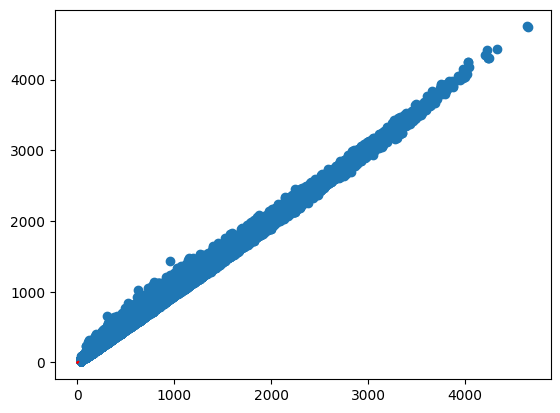

In [43]:
plt.scatter(df_carbon_emission['Actual'],df_carbon_emission['Predicted'])
plt.plot(Y_test2,Y_test2,'r')